In [1]:
import os
import shutil
import cv2
from skimage.metrics import structural_similarity
import numpy as np

def extract_gt(real_pic_path, fake_pic_path, mask_pic_path):
    real_image = cv2.imread(real_pic_path)
    fake_image = cv2.imread(fake_pic_path)

    if fake_image.shape != real_image.shape:
        print(f"Note same shape: {real_pic_path} shape ({real_image.shape}) and {fake_pic_path} shape ({fake_image.shape})")
        print(fake_pic_path)
    if fake_image.shape == real_image.shape:
        try:
            # convert images to grayscale
            gray_real_image = cv2.cvtColor(real_image, cv2.COLOR_BGR2GRAY)
            gray_fake_image = cv2.cvtColor(fake_image, cv2.COLOR_BGR2GRAY)
            # get the difference of the 2 grayscale images
            (_, diff) = structural_similarity(gray_real_image, gray_fake_image, full=True)
            diff = cv2.medianBlur(diff, 1)
            # make background black and tampered area white
            mask = np.ones_like(diff)
            mask[diff < 0.98] = 1
            mask[diff >= 0.98] = 0
            mask = (mask * 255).astype("uint8")
            cv2.imwrite(mask_pic_path, mask)
        except Exception as error:
            print(error, real_pic_path)



def move_file(source, destination):
    try:
        shutil.move(source, destination)
        print(f"File moved from {source} to {destination}")
    except Exception as e:
        print(f"Error: {e}")

def rename_file(old_name, new_name):
    try:
        os.rename(old_name, new_name)
        print(f"File {old_name} renamed to {new_name}")
    except Exception as e:
        print(f"Error: {e}")

In [29]:
dir = r"D:\dungnd\data\ChinhSuaAnh\14"
real = r"D:\dungnd\data\DATA_USB\14\Real"
fake = r"D:\dungnd\data\DATA_USB\14\Fake"
mask = r"D:\dungnd\data\DATA_USB\14\Mask"
folders = os.listdir(dir)
c=0
for folder in folders:
    img_names = os.listdir(os.path.join(dir, folder))
    anh_goc = max(img_names, key=len)
    r = os.path.join(real, anh_goc)
    move_file(os.path.join(dir, folder, anh_goc), r)
    with open(r'D:\dungnd\GraduationProject\USB-14-auth.txt', 'a') as file:
        file.write(r + " None 0" + '\n')
    for image_name in img_names:
        if len(image_name)<=6:
            old_name=image_name
            c+=1
            print("Processing image "+str(c)+"-th")
            image_name = image_name.replace("1.", "_saochep_1.")\
                            .replace("2.", "_saochep_2.")\
                            .replace("3.", "_doimau_1.")\
                            .replace("4.", "_doimau_2.")\
                            .replace("5.", "_tutanh_1.")\
                            .replace("6.", "_tutanh_2.")\
                            .replace("7.", "_catghep_1.")\
                            .replace("8.", "_catghep_2.")\
                            .replace("9.", "_xoay_1.")\
                            .replace("10.", "_xoay_2.")
            fake_img_name = anh_goc.split(".")[0]+image_name
            f = os.path.join(fake, fake_img_name)
            m = os.path.join(mask, fake_img_name.split(".")[0]+"_mask.png")
            move_file(os.path.join(dir, folder, old_name), f)

            extract_gt(r, f, m)
            with open(r'D:\dungnd\GraduationProject\USB-14-manip.txt', 'a') as file:
                file.write(f + " " + m + " 1" + '\n')

File moved from D:\dungnd\data\ChinhSuaAnh\14\1\DSC_0751.JPG to D:\dungnd\data\DATA_USB\14\Real\DSC_0751.JPG
Processing image 1-th
File moved from D:\dungnd\data\ChinhSuaAnh\14\1\1.jpg to D:\dungnd\data\DATA_USB\14\Fake\DSC_0751_saochep_1.jpg
D:\dungnd\data\DATA_USB\14\Real\DSC_0751.JPG


(2000, 2992, 3)
(2000, 2992, 3)
Processing image 2-th
File moved from D:\dungnd\data\ChinhSuaAnh\14\1\10.jpg to D:\dungnd\data\DATA_USB\14\Fake\DSC_0751_xoay_2.jpg
D:\dungnd\data\DATA_USB\14\Real\DSC_0751.JPG
(2000, 2992, 3)
(2000, 2992, 3)
Processing image 3-th
File moved from D:\dungnd\data\ChinhSuaAnh\14\1\2.jpg to D:\dungnd\data\DATA_USB\14\Fake\DSC_0751_saochep_2.jpg
D:\dungnd\data\DATA_USB\14\Real\DSC_0751.JPG
(2000, 2992, 3)
(2000, 2992, 3)
Processing image 4-th
File moved from D:\dungnd\data\ChinhSuaAnh\14\1\3.jpg to D:\dungnd\data\DATA_USB\14\Fake\DSC_0751_doimau_1.jpg
D:\dungnd\data\DATA_USB\14\Real\DSC_0751.JPG
(2000, 2992, 3)
(2000, 2992, 3)
Processing image 5-th
File moved from D:\dungnd\data\ChinhSuaAnh\14\1\4.jpg to D:\dungnd\data\DATA_USB\14\Fake\DSC_0751_doimau_2.jpg
D:\dungnd\data\DATA_USB\14\Real\DSC_0751.JPG
(2000, 2992, 3)
(2000, 2992, 3)
Processing image 6-th
File moved from D:\dungnd\data\ChinhSuaAnh\14\1\5.jpg to D:\dungnd\data\DATA_USB\14\Fake\DSC_0751_tutanh_1

In [35]:
anhgoc_dir = r"D:\dungnd\data\ChinhSuaAnh\6\anh_goc"
anhsua_dir = r"D:\dungnd\data\ChinhSuaAnh\6\anh_sua"

real_6 = r"D:\dungnd\data\DATA_USB\6\Real"
fake_6 = r"D:\dungnd\data\DATA_USB\6\Fake"
mask_6 = r"D:\dungnd\data\DATA_USB\6\Mask"
c=0
for folder_name in os.listdir(anhsua_dir):
    for anhgoc_name in os.listdir(anhgoc_dir):
        name = anhgoc_name.split(".")[0]
        if name == folder_name:
            r = os.path.join(real_6, anhgoc_name)
            move_file(os.path.join(anhgoc_dir, anhgoc_name), r)
            with open(r'D:\dungnd\GraduationProject\USB-6-auth.txt', 'a') as file:
                file.write(r + " None 0" + '\n')
            for img in os.listdir(os.path.join(anhsua_dir, folder_name)):
                c+=1
                print(f"Processing image {c}-th")
                old_name = img
                img = img.replace("1.Copy-Move-","_saochep_")\
                        .replace("2.Change-color-","_doimau_")\
                        .replace("2.Change-color-","_doimau_")\
                        .replace("3.Retouching-","_tutanh_")\
                        .replace("4.Splicing-","_catghep_")\
                        .replace("5.Rotate-","_xoay_")
                f = os.path.join(fake_6, folder_name+"_"+img)
                m = os.path.join(mask_6, folder_name+"_"+img.split(".")[0]+"_mask.png")
                move_file(os.path.join(anhsua_dir, folder_name, old_name), f)
                extract_gt(r, f, m)
                with open(r'D:\dungnd\GraduationProject\USB-6-manip.txt', 'a') as file:
                    file.write(f + " " + m + " 1" + '\n')

File moved from D:\dungnd\data\ChinhSuaAnh\6\anh_goc\IMGP1954.JPG to D:\dungnd\data\DATA_USB\6\Real\IMGP1954.JPG
Processing image 1-th
File moved from D:\dungnd\data\ChinhSuaAnh\6\anh_sua\IMGP1954\1.Copy-Move-1.png to D:\dungnd\data\DATA_USB\6\Fake\IMGP1954__saochep_1.png
Processing image 2-th
File moved from D:\dungnd\data\ChinhSuaAnh\6\anh_sua\IMGP1954\1.Copy-Move-2.png to D:\dungnd\data\DATA_USB\6\Fake\IMGP1954__saochep_2.png
Processing image 3-th
File moved from D:\dungnd\data\ChinhSuaAnh\6\anh_sua\IMGP1954\2.Change-color-1.png to D:\dungnd\data\DATA_USB\6\Fake\IMGP1954__doimau_1.png
Processing image 4-th
File moved from D:\dungnd\data\ChinhSuaAnh\6\anh_sua\IMGP1954\2.Change-color-2.png to D:\dungnd\data\DATA_USB\6\Fake\IMGP1954__doimau_2.png
Processing image 5-th
File moved from D:\dungnd\data\ChinhSuaAnh\6\anh_sua\IMGP1954\3.Retouching-1.png to D:\dungnd\data\DATA_USB\6\Fake\IMGP1954__tutanh_1.png
Processing image 6-th
File moved from D:\dungnd\data\ChinhSuaAnh\6\anh_sua\IMGP1954

In [38]:
import random 

def split_data(input_file, val_output_file, train_output_file, split_ratio=0.2):
    with open(input_file, "r") as f:
        lines = f.readlines()

    # Calculate the number of lines to include in validation set
    num_lines_val = int(len(lines) * split_ratio)

    # Randomly select lines for validation set
    val_lines = random.sample(lines, num_lines_val)

    # Write validation set to file
    with open(val_output_file, "w") as f:
        f.writelines(val_lines)

    # Write training set to file
    with open(train_output_file, "w") as f:
        for line in lines:
            if line not in val_lines:
                f.write(line)


# Define the filenames
input_file = r"D:\dungnd\GraduationProject\MMFusion-IML\data\USB-6-manip.txt"
val_output_file = r"D:\dungnd\GraduationProject\MMFusion-IML\data\USB-6_splits\val\USB-6-manip.txt"
train_output_file = r"D:\dungnd\GraduationProject\MMFusion-IML\data\USB-6_splits\train\USB-6-manip.txt"
split_data(input_file, val_output_file, train_output_file)

In [26]:
anhgoc_dir = r"D:\dungnd\data\ChinhSuaAnh\20\anh_goc"
anhsua_dir = r"D:\dungnd\data\ChinhSuaAnh\20\anh_sua"

real_20 = r"D:\dungnd\data\DATA_USB\20\Real"
fake_20 = r"D:\dungnd\data\DATA_USB\20\Fake"
mask_20 = r"D:\dungnd\data\DATA_USB\20\Mask"

anhgocs = os.listdir(anhgoc_dir)
folders = os.listdir(anhsua_dir)
folders.remove('24')

for i, folder in enumerate(sorted(folders, key=lambda x: int(x))):
    r = os.path.join(real_20, anhgocs[i])
    move_file(os.path.join(anhgoc_dir, anhgocs[i]), r)
    with open(r'D:\dungnd\GraduationProject\USB-20-auth.txt', 'a') as file:
        file.write(r + " None 0" + '\n')
    for img in os.listdir(os.path.join(anhsua_dir, folder)):
        f = os.path.join(fake_20, img)
        m = os.path.join(mask_20, img.split(".")[0]+"_mask.png")
        move_file(os.path.join(anhsua_dir, folder, img), f)

        extract_gt(r, f, m)
        with open(r'D:\dungnd\GraduationProject\USB-20-manip.txt', 'a') as file:
            file.write(f + " " + m + " 1" + '\n')

            
            

File moved from D:\dungnd\data\ChinhSuaAnh\20\anh_goc\IMGP2071.JPG to D:\dungnd\data\DATA_USB\20\Real\IMGP2071.JPG
File moved from D:\dungnd\data\ChinhSuaAnh\20\anh_sua\7\IMGP2071_cpm1.png to D:\dungnd\data\DATA_USB\20\Fake\IMGP2071_cpm1.png
File moved from D:\dungnd\data\ChinhSuaAnh\20\anh_sua\7\IMGP2071_cpm2.png to D:\dungnd\data\DATA_USB\20\Fake\IMGP2071_cpm2.png
File moved from D:\dungnd\data\ChinhSuaAnh\20\anh_sua\7\IMGP2071_splc1.png to D:\dungnd\data\DATA_USB\20\Fake\IMGP2071_splc1.png
File moved from D:\dungnd\data\ChinhSuaAnh\20\anh_sua\7\IMGP2071_splc2.png to D:\dungnd\data\DATA_USB\20\Fake\IMGP2071_splc2.png
File moved from D:\dungnd\data\ChinhSuaAnh\20\anh_goc\IMGP2072.JPG to D:\dungnd\data\DATA_USB\20\Real\IMGP2072.JPG
File moved from D:\dungnd\data\ChinhSuaAnh\20\anh_sua\8\IMGP2072_cpm1.png to D:\dungnd\data\DATA_USB\20\Fake\IMGP2072_cpm1.png
File moved from D:\dungnd\data\ChinhSuaAnh\20\anh_sua\8\IMGP2072_cpm2.png to D:\dungnd\data\DATA_USB\20\Fake\IMGP2072_cpm2.png
File

In [48]:
import random 

def split_data(input_file, val_output_file, train_output_file, split_ratio=0.2):
    with open(input_file, "r") as f:
        lines = f.readlines()

    # Calculate the number of lines to include in validation set
    num_lines_val = int(len(lines) * split_ratio)

    # Randomly select lines for validation set
    val_lines = random.sample(lines, num_lines_val)

    # Write validation set to file
    with open(val_output_file, "w") as f:
        f.writelines(val_lines)

    # Write training set to file
    with open(train_output_file, "w") as f:
        for line in lines:
            if line not in val_lines:
                f.write(line)


# Define the filenames
input_file = r"D:\dungnd\GraduationProject\MMFusion-IML\data\USB-20-auth.txt"
val_output_file = r"D:\dungnd\GraduationProject\MMFusion-IML\data\USB-20_splits\val\USB-20-auth.txt"
train_output_file = r"D:\dungnd\GraduationProject\MMFusion-IML\data\USB-20_splits\train\USB-20-auth.txt"
split_data(input_file, val_output_file, train_output_file)

In [80]:
anhgoc_dir = r"D:\dungnd\data\ChinhSuaAnh\22\anh_goc"
anhsua_dir = r"D:\dungnd\data\ChinhSuaAnh\22\anh_sua"

real_22 = r"D:\dungnd\data\DATA_USB\22\Real"
fake_22 = r"D:\dungnd\data\DATA_USB\22\Fake"
mask_22 = r"D:\dungnd\data\DATA_USB\22\Mask"


i=0
for fo in os.listdir(anhsua_dir):
    for img in os.listdir(os.path.join(anhsua_dir, fo)):
        if len(img) <= 12:
            r = os.path.join(real_22, img)
            with open(r'D:\dungnd\GraduationProject\USB-22-auth.txt', 'a') as file:
                file.write(r + " None 0" + '\n')
        else:
            i+=1
            print(f"Processing image {i}-th")
            f = os.path.join(fake_22, img)
            m = os.path.join(mask_22, img.split(".")[0]+"_mask.png")

            move_file(os.path.join(anhsua_dir, fo, img), f)
            extract_gt(r, f, m)
            with open(r'D:\dungnd\GraduationProject\USB-22-manip.txt', 'a') as file:
                file.write(f + " " + m + " 1" + '\n')



Processing image 1-th
File moved from D:\dungnd\data\ChinhSuaAnh\22\anh_sua\10\IMGP2029_cat_dan_1.jpg to D:\dungnd\data\DATA_USB\22\Fake\IMGP2029_cat_dan_1.jpg
Processing image 2-th
File moved from D:\dungnd\data\ChinhSuaAnh\22\anh_sua\10\IMGP2029_cat_dan_2.jpg to D:\dungnd\data\DATA_USB\22\Fake\IMGP2029_cat_dan_2.jpg
Processing image 3-th
File moved from D:\dungnd\data\ChinhSuaAnh\22\anh_sua\10\IMGP2029_doi_mau_1.jpg to D:\dungnd\data\DATA_USB\22\Fake\IMGP2029_doi_mau_1.jpg
Processing image 4-th
File moved from D:\dungnd\data\ChinhSuaAnh\22\anh_sua\10\IMGP2029_doi_mau_2.jpg to D:\dungnd\data\DATA_USB\22\Fake\IMGP2029_doi_mau_2.jpg
Processing image 5-th
File moved from D:\dungnd\data\ChinhSuaAnh\22\anh_sua\10\IMGP2029_ghep_anh_1.jpg to D:\dungnd\data\DATA_USB\22\Fake\IMGP2029_ghep_anh_1.jpg
Processing image 6-th
File moved from D:\dungnd\data\ChinhSuaAnh\22\anh_sua\10\IMGP2029_ghep_anh_2.jpg to D:\dungnd\data\DATA_USB\22\Fake\IMGP2029_ghep_anh_2.jpg
Processing image 7-th
File moved fro

In [109]:
anhgoc_dir = r"D:\dungnd\data\ChinhSuaAnh\25\anh_goc"
anhsua_dir = r"D:\dungnd\data\ChinhSuaAnh\25\anh_sua"

real_25 = r"D:\dungnd\data\DATA_USB\25\Real"
fake_25 = r"D:\dungnd\data\DATA_USB\25\Fake"
mask_25 = r"D:\dungnd\data\DATA_USB\25\Mask"

for anhgoc in os.listdir(anhgoc_dir):
    ag = os.path.join(anhgoc_dir, anhgoc)
    r = os.path.join(real_25, anhgoc)
    move_file(ag, r)
    with open(r'D:\dungnd\GraduationProject\USB-25-auth.txt', 'a') as file:
        file.write(r + " None 0" + '\n')
    for fo in os.listdir(anhsua_dir):
        if(anhgoc.split(".")[0] == fo):
            for img in os.listdir(os.path.join(anhsua_dir, fo)):
                anhsua = os.path.join(anhsua_dir, fo, img)
                f = os.path.join(fake_25, img)
                m = os.path.join(mask_25, img.split(".")[0]+"_mask.png")
                move_file(anhsua, f)
                extract_gt(r, f, m)
                with open(r'D:\dungnd\GraduationProject\USB-25-manip.txt', 'a') as file:
                    file.write(f + " " + m + " 1" + '\n')

File moved from D:\dungnd\data\ChinhSuaAnh\25\anh_goc\IMGP8698.JPG to D:\dungnd\data\DATA_USB\25\Real\IMGP8698.JPG
File moved from D:\dungnd\data\ChinhSuaAnh\25\anh_sua\IMGP8698\IMGP8698_copy_move_2.png to D:\dungnd\data\DATA_USB\25\Fake\IMGP8698_copy_move_2.png
File moved from D:\dungnd\data\ChinhSuaAnh\25\anh_sua\IMGP8698\IMGP8698_move_copy.png to D:\dungnd\data\DATA_USB\25\Fake\IMGP8698_move_copy.png
File moved from D:\dungnd\data\ChinhSuaAnh\25\anh_sua\IMGP8698\IMGP8698_splicing.png to D:\dungnd\data\DATA_USB\25\Fake\IMGP8698_splicing.png
File moved from D:\dungnd\data\ChinhSuaAnh\25\anh_sua\IMGP8698\IMGP8698_splicing_2.png to D:\dungnd\data\DATA_USB\25\Fake\IMGP8698_splicing_2.png
File moved from D:\dungnd\data\ChinhSuaAnh\25\anh_goc\IMGP8699.JPG to D:\dungnd\data\DATA_USB\25\Real\IMGP8699.JPG
File moved from D:\dungnd\data\ChinhSuaAnh\25\anh_sua\IMGP8699\IMGP8699_copy_move.png to D:\dungnd\data\DATA_USB\25\Fake\IMGP8699_copy_move.png
File moved from D:\dungnd\data\ChinhSuaAnh\25\

In [4]:
import random 

def split_data(input_file, val_output_file, train_output_file, split_ratio=0.2):
    with open(input_file, "r") as f:
        lines = f.readlines()

    # Calculate the number of lines to include in validation set
    num_lines_val = int(len(lines) * split_ratio)

    # Randomly select lines for validation set
    val_lines = random.sample(lines, num_lines_val)

    # Write validation set to file
    with open(val_output_file, "w") as f:
        f.writelines(val_lines)

    # Write training set to file
    with open(train_output_file, "w") as f:
        for line in lines:
            if line not in val_lines:
                f.write(line)


# Define the filenames
input_file = r"D:\dungnd\GraduationProject\MMFusion-IML\data\USB-25-auth.txt"
val_output_file = r"D:\dungnd\GraduationProject\MMFusion-IML\data\USB-25_splits\val\USB-25-auth.txt"
train_output_file = r"D:\dungnd\GraduationProject\MMFusion-IML\data\USB-25_splits\train\USB-25-auth.txt"
split_data(input_file, val_output_file, train_output_file)

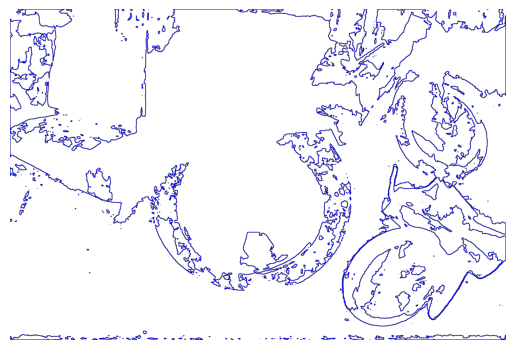

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

transparent_img = r"D:\dungnd\GraduationProject\server\red_regions_transparent.png"
heat_map = cv2.imread(transparent_img, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to convert to binary image
_, binary_image = cv2.threshold(heat_map, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a transparent blank canvas
canvas = np.zeros((heat_map.shape[0], heat_map.shape[1], 4), dtype=np.uint8)
canvas[:, :, 3] = 0  # Set alpha channel to 0 (fully transparent)

# Choose a color for the contour (BGR format)
contour_color = (0, 0, 255)  # Red color

# Draw contours on the canvas with the specified color
cv2.drawContours(canvas, contours, -1, contour_color + (255,), 2)  # Contour color with full opacity
plt.imshow(canvas)
plt.axis("off")
plt.show()

In [1]:
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
fake = r"D:\dungnd\data\DATA_USB\5\Fake"
output = r"D:\dungnd\data\test_img_5"
i=0

for img in os.listdir(output):
    try:
        img=img.replace("_mask","")
        print(fake+":"+img)
        fake_img = cv2.imread(os.path.join(fake, img))
        output_img = cv2.imread(os.path.join(output, img))

        fake_img = cv2.cvtColor(fake_img, cv2.COLOR_BGR2RGB)
        output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

        # Plot images
        plt.figure(figsize=(10, 5))

        # Plot fake image
        plt.subplot(1, 2, 1)
        plt.imshow(fake_img)
        plt.title(f'Fake Image {i + 1}')
        plt.axis('off')

        # Plot output image
        plt.subplot(1, 2, 2)
        plt.imshow(output_img)
        plt.title(f'Output Image {i + 1}')
        plt.axis('off')

        # Show plot
        plt.show()
    except:
        print(img)



D:\dungnd\data\DATA_USB\5\Fake:DSC_0311_catghep_1.png
DSC_0311_catghep_1.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0311_catghep_2.png
DSC_0311_catghep_2.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0311_doimau_1.png
DSC_0311_doimau_1.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0311_doimau_2.png
DSC_0311_doimau_2.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0311_saochep_1.png
DSC_0311_saochep_1.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0311_saochep_2.png
DSC_0311_saochep_2.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0311_tutanh_1.png
DSC_0311_tutanh_1.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0311_tutanh_2.png
DSC_0311_tutanh_2.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0311_xoay_1.png
DSC_0311_xoay_1.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0311_xoay_2.png
DSC_0311_xoay_2.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0312_catghep_1.png
DSC_0312_catghep_1.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0312_catghep_2.png
DSC_0312_catghep_2.png
D:\dungnd\data\DATA_USB\5\Fake:DSC_0312_doimau_1.png
DSC_0312_doimau_1.png
D:\dungnd\data\DATA_U